# Hamza Al Hajj Chehade, Amshumann Singh, Vaishnavi Dixit


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from matplotlib import patches


In [38]:
bank=pd.read_csv('bank.csv',delimiter=';')
bank_additional=pd.read_csv('bank-additional.csv',delimiter=';')
bank_full=pd.read_csv('bank-full.csv',delimiter=';')
bank_additional_full=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [39]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [40]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [41]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [43]:
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [44]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Since the bank_additional_full dataset contains all columns and all entries so it is the data that must be studied.

In [45]:
data=bank_additional_full

In [46]:
data.shape

(41188, 21)

In [47]:
# Rename the columns:
data.rename(columns={'emp.var.rate':'EVR','cons.price.idx':'CPI','cons.conf.idx':'CCI','euribor3m':'euribor3m',
                     'nr.employed':'no_emp'},inplace=True)

In [48]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'EVR', 'CPI', 'CCI', 'euribor3m', 'no_emp',
       'y'],
      dtype='object')

# Data Cleaning:

In [49]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
EVR            0
CPI            0
CCI            0
euribor3m      0
no_emp         0
y              0
dtype: int64

There exist no NA values in our dataset

In [50]:
data.duplicated().any()

True

In [51]:
data[data.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EVR,CPI,CCI,euribor3m,no_emp,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


These duplicates doesnot show that there exist clients with same details, it shows that duplication happened while entering the data.

In [52]:
# Removing Duplicates:
data.drop_duplicates(inplace=True)

In [53]:
data.shape

(41176, 21)

We can notice that we removed 12 duplicates from our dataset.

Now let's look at the numerical columns values. The most convenient way to look at the numerical values is plotting histograms.

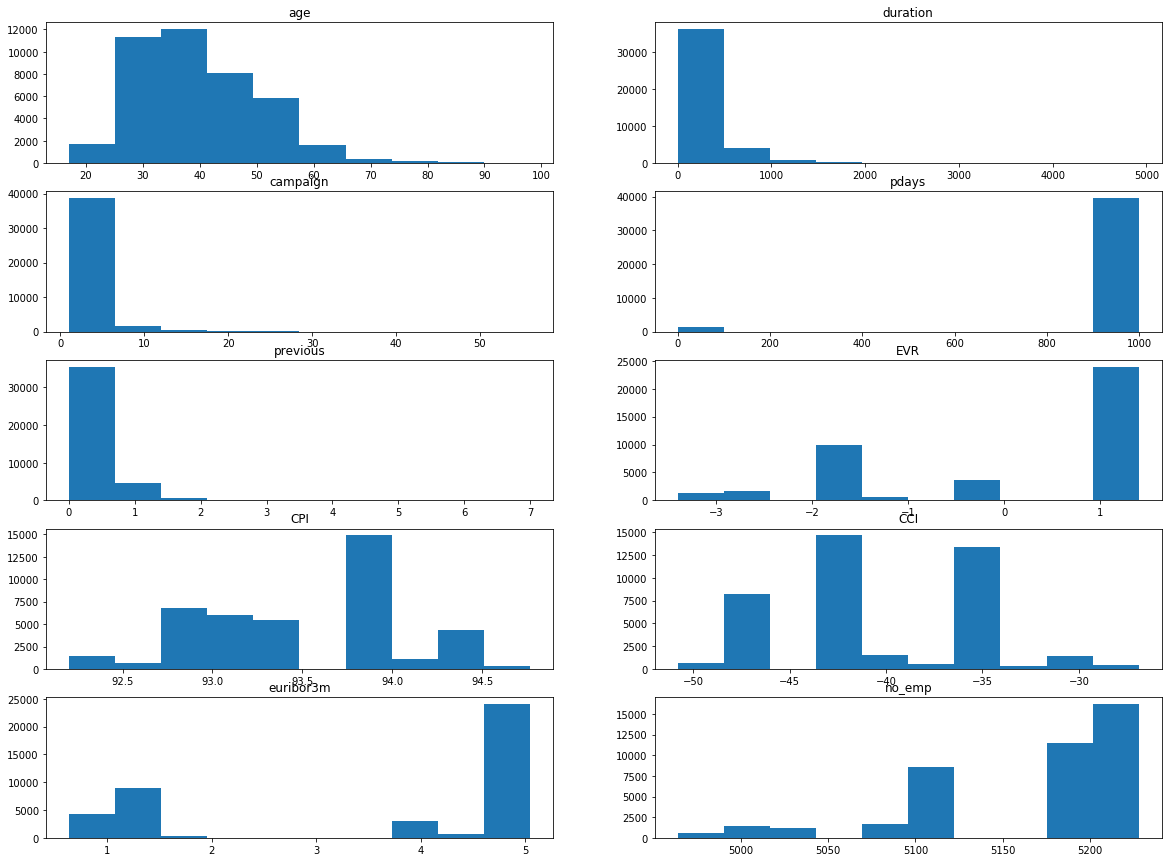

In [54]:
num_columns=['age','duration','campaign','pdays','previous','EVR','CPI','CCI','euribor3m','no_emp']
fig,axs=plt.subplots(5,2,figsize=(20,15))
counter=0
for num_col in num_columns:
    trace_x=counter//2
    trace_y=counter%2
    axs[trace_x,trace_y].hist(data[num_col])
    axs[trace_x,trace_y].set_title(num_col)
    counter += 1
plt.show()

In [55]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('---'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['no' 'yes' 'unknown']
------------------------------------------------------------


In [56]:
# Handling Outliers:

In [57]:
df1= data[['age','duration','campaign']]
data1=data

Text(0.5, 1.0, 'No of Employee')

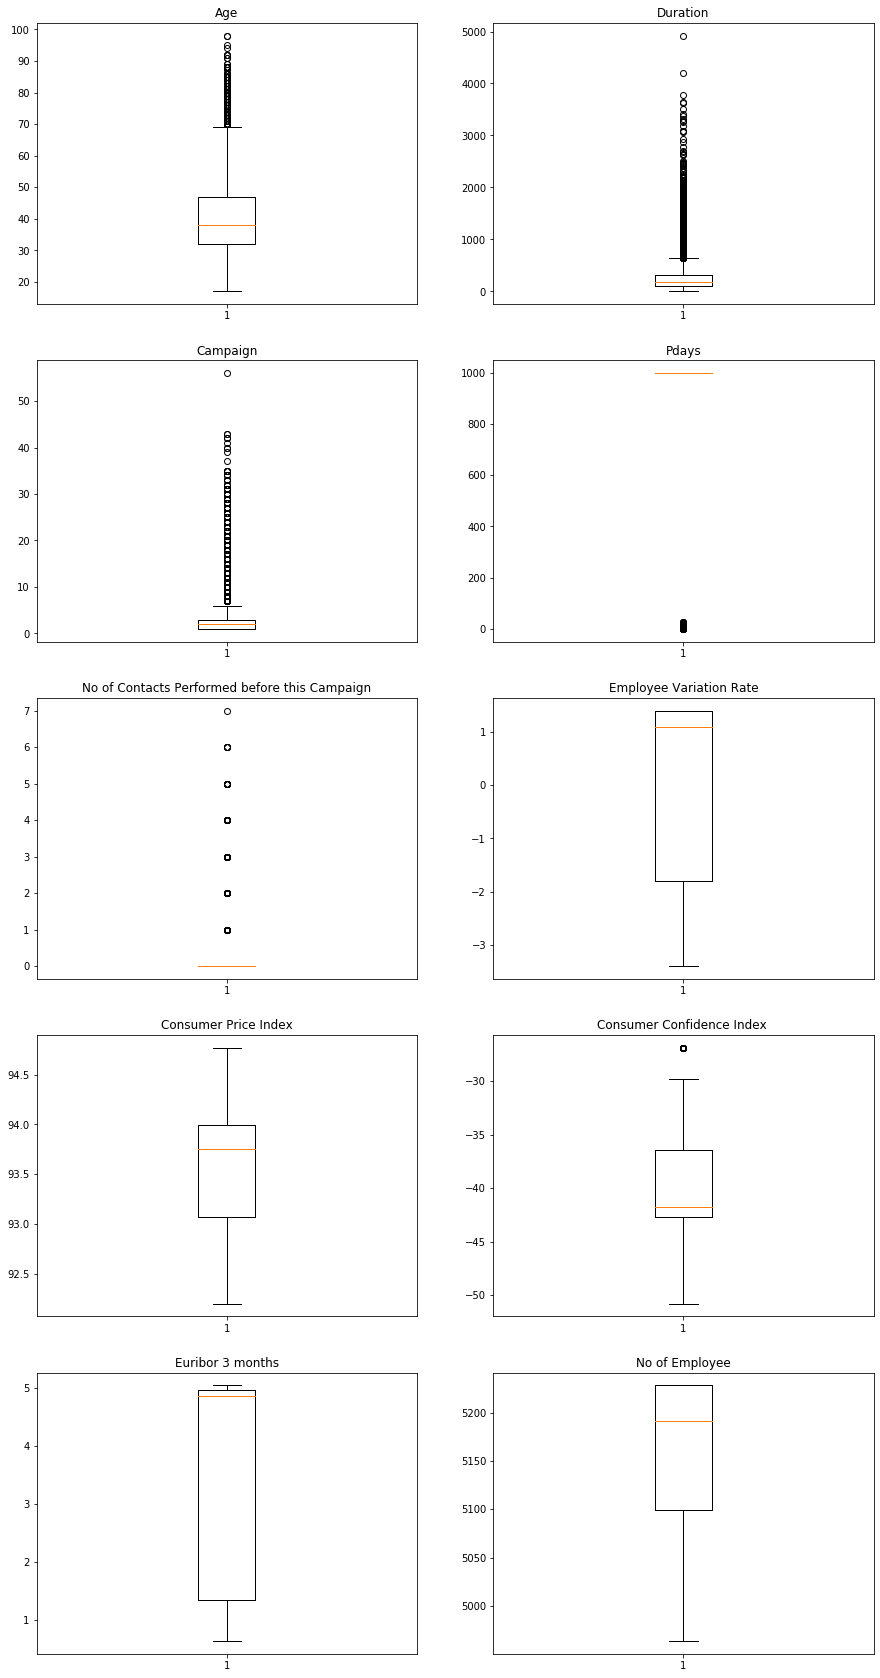

In [58]:
plt.figure(figsize=(15,30))

ax=plt.subplot(521)
plt.boxplot(data['age'])
ax.set_title('Age')

ax=plt.subplot(522)
plt.boxplot(data['duration'])
ax.set_title('Duration')

ax=plt.subplot(523)
plt.boxplot(data['campaign'])
ax.set_title('Campaign')

ax=plt.subplot(524)
plt.boxplot(data['pdays'])
ax.set_title('Pdays')

ax=plt.subplot(525)
plt.boxplot(data['previous'])
ax.set_title('No of Contacts Performed before this Campaign')

ax=plt.subplot(526)
plt.boxplot(data['EVR'])
ax.set_title('Employee Variation Rate')

ax=plt.subplot(527)
plt.boxplot(data['CPI'])
ax.set_title('Consumer Price Index')

ax=plt.subplot(528)
plt.boxplot(data['CCI'])
ax.set_title('Consumer Confidence Index ')

ax=plt.subplot(529)
plt.boxplot(data['euribor3m'])
ax.set_title('Euribor 3 months')

ax=plt.subplot(5,2,10)
plt.boxplot(data['no_emp'])
ax.set_title('No of Employee')

We notice that all the features have no outliers except age, duration, and campaign. So let's fix therse outliers using IQR approach:

In [59]:
numerical_features=['age','duration','campaign']
for col in numerical_features:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR= Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    filter=(data[col] >= lower_limit)&(data[col] <= upper_limit)
    data=data.loc[filter]
    
data.shape

(35524, 21)

5652 values have been removed from the dataset by the IQR approach

Text(0.5, 1.0, 'Campaign')

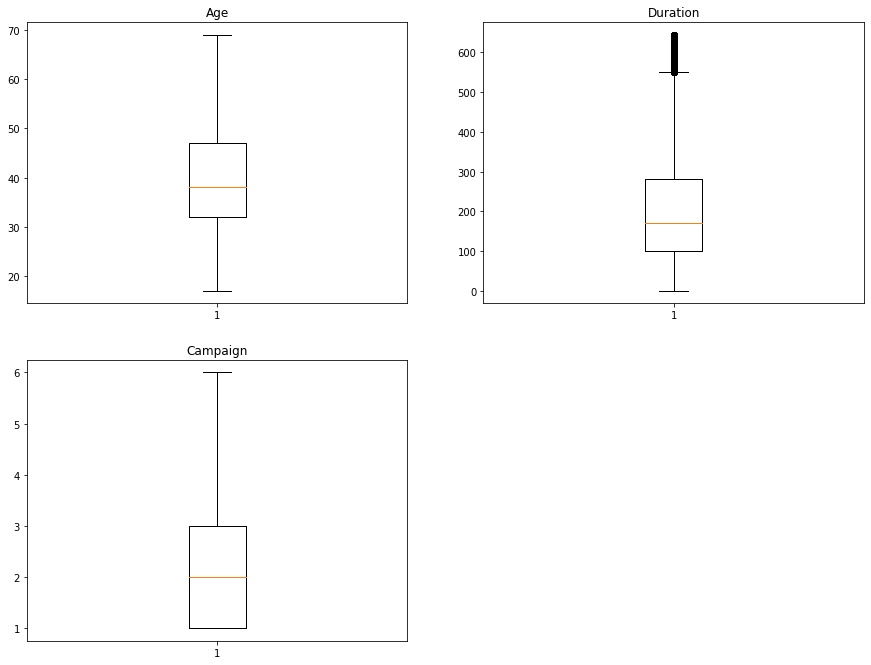

In [62]:
plt.figure(figsize=(15,30))

ax=plt.subplot(521)
plt.boxplot(data['age'])
ax.set_title('Age')

ax=plt.subplot(522)
plt.boxplot(data['duration'])
ax.set_title('Duration')

ax=plt.subplot(523)
plt.boxplot(data['campaign'])
ax.set_title('Campaign')

We attempt to use another approach to identify outliers by using Mahanalobis distance for the 3 variables with doubts around the presence of outliers. The columns are Age, Duration and Campaign.


In [63]:
# Second approach to outlier analysis:
df1= data[['age','duration','campaign']]
df1=df1.dropna()
df1=df1.to_numpy()
df1

array([[ 56, 261,   1],
       [ 57, 149,   1],
       [ 37, 226,   1],
       ...,
       [ 46, 383,   1],
       [ 56, 189,   2],
       [ 44, 442,   1]], dtype=int64)

In [64]:
#Covariance Matrix
covar= np.cov(df1,rowvar=False)
covar1= np.linalg.matrix_power(covar,-1)
centerpt= np.mean(df1, axis=0)

In [65]:
#distance between centrepoitn and observations
dist=[]
for i,val in enumerate(df1):
    p1=val
    p2=centerpt
    distance=(p1-p2).T.dot(covar1).dot(p1-p2)
    dist.append(distance)
dist=np.array(dist)

#cutoff value from chi-square distribution for outliers
cutoff=chi2.ppf(0.95,df1.shape[1])

#index of outliers
outlierIndexes=np.where(dist>cutoff)

print(outlierIndexes)
print(df1[dist>cutoff, :])

(array([   45,   104,   110, ..., 35507, 35515, 35516], dtype=int64),)
[[ 57 616   1]
 [ 60 514   1]
 [ 57 518   1]
 ...
 [ 62 154   5]
 [ 57 124   6]
 [ 62 483   2]]


<Figure size 1800x3600 with 0 Axes>

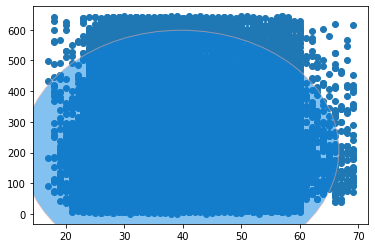

In [66]:
## Finding ellipse dimensions 
plt.figure(figsize=(25,50))
pearson = covar[0, 1]/np.sqrt(covar[0, 0] * covar[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covar)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpt[0], centerpt[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df1[: , 0], df1[ : , 1])
plt.show()

As you can clearly see from the ellipse just above, the Multivariate approach used here isn't really suited for the data we have here. This may be due to the higher number of observations, the relationship between the observations themselves or due to the discrete nature of the variables in question.


We use a 3rd approach to eliminate outliers for the 3 variables we have already been working on:

In [67]:
#Eliminating Outliers for age
upper = data1['age'].mean() + 3*data1['age'].std()
lower = data1['age'].mean() - 3*data1['age'].std()
print(f'Upper limit for col - age is {upper} & lower limit is {lower}')
data1 = data1[(data1['age'] < upper) & (data1['age'] > lower) ]  
data1.shape

Upper limit for col - age is 71.2858398788315 & lower limit is 8.76176066517472


(40807, 21)

In [68]:
#Eliminating Outliers for duration
upper = data1['duration'].mean() + 3*data1['duration'].std()
lower = data1['duration'].mean() - 3*data1['duration'].std()
print(f'Upper limit for col - duration is {upper} & lower limit is {lower}')
data1 = data1[(data1['duration'] < upper) & (data1['duration'] > lower) ]  
data1.shape

Upper limit for col - duration is 1037.3596861184076 & lower limit is -521.0020513988741


(39954, 21)

In [69]:
#Eliminating Outliers for campaign
upper = data1['campaign'].mean() + 3*data1['campaign'].std()
lower = data1['campaign'].mean() - 3*data1['campaign'].std()
print(f'Upper limit for col -campaign {upper} & lower limit is {lower}')
data1 = data1[(data1['campaign'] < upper) & (data1['campaign'] > lower) ]  
data1.shape

Upper limit for col -campaign 10.930846687242923 & lower limit is -5.785429457428637


(39101, 21)

2076 rows where droped till now to remove outliers using z-score and to remove duplicates


C:\Users\Amshu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


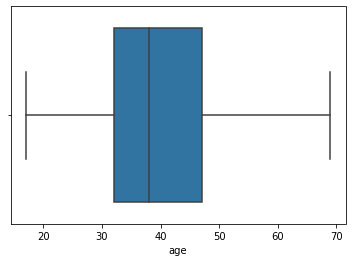

In [70]:
sns.boxplot(data['age'])

C:\Users\Amshu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


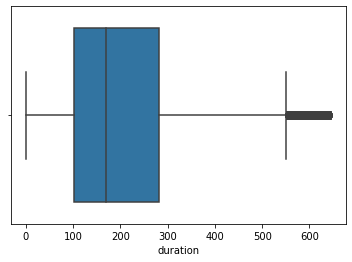

In [71]:
sns.boxplot(data['duration'])

C:\Users\Amshu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


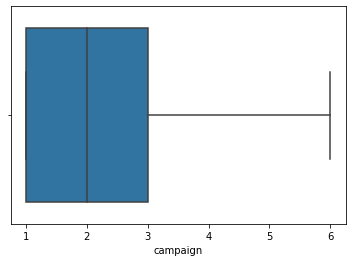

In [72]:
sns.boxplot(data['campaign'])

In the end the IQR approach suits this dataset the best and that's the approach used to define the dataset as we progress further

In [39]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('---'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 58 32 38 44 42
 60 53 47 48 33 51 31 52 43 36 28 27 26 22 23 20 21 61 19 18 66 68 63 62
 65 64 67 69 17]
------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['no' 'yes' 'unknown']
------------------------------------------------------------
loan
['no' 'yes' 'unknown']
------------------------------------------------

# Data Transformation:

In [658]:
# Education Feature - Category Clubbing:

In [659]:
data1=data.copy()
list=['basic.9y','basic.6y','basic.4y']
for i in list:
    data1.loc[data1['education']==i,'education']='middle school'
data1.education.value_counts()

middle school          10678
university.degree      10548
high.school             8278
professional.course     4548
unknown                 1458
illiterate                14
Name: education, dtype: int64

We have clubbed all the categories in education into one which means that 'basic.9y','basic.6y','basic.4y' are combined for one educational level which is middle school

In [660]:
# Encoding Month - Day of Week Features:

In [661]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
data1['month']= data1['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
data1['day_of_week']= data1['day_of_week'].map(day_dict)

In [662]:
data1.loc[:,['month','day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


We have encoded the month and days of week features

In [663]:
# Encoding 999 value of pday feature by 0:

In [664]:
data1.loc[data1['pdays']==999,'pdays']=0

In [665]:
data1.pdays.value_counts()

0     34269
3       367
6       342
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

We have converted 999 to 0 in pdays

In [666]:
# Encoding default, loan and housing features:

In [667]:
dictionary={'yes':1,'no':0,'unknown':-1}
data1.housing=data1['housing'].map(dictionary)
data1.loan=data1['loan'].map(dictionary)
data1.default=data1['default'].map(dictionary)

In [668]:
dictionary1={'yes':1,'no':0}
data1.y=data1['y'].map(dictionary1)

In [669]:
data1.loc[:,['housing','loan','default','y']].head()

,housing,loan,default,y
0,0,0,0,0
1,0,0,-1,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [670]:
# Dummy Encoding of contact and poutcome features:

In [671]:
dummy_contact=pd.get_dummies(data1['contact'], prefix='dummy')
dummy_outcome=pd.get_dummies(data1['poutcome'], prefix='dummy',drop_first=True)
data1 = pd.concat([data1,dummy_contact,dummy_outcome],axis=1)
data1.drop(['contact','poutcome'],axis=1, inplace=True)

In [672]:
data1.loc[:,['dummy_cellular','dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_cellular,dummy_telephone,dummy_nonexistent,dummy_success
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


We have performed one hot encoding fo the above features and dropped the original features. In addition to that we have dropped the dummy_failure since its result on the target variable is known which means that if the outcome of the previous campaign is failure so consequently the client will make no deposit.

In [673]:
# Frequency Encoding of Education and Job features:

In [674]:
bank_job=data1.job.value_counts().to_dict()
bank_edu=data1.education.value_counts().to_dict()

In [675]:
data1['job']=data1.job.map(bank_job)
data1['education']=data1.education.map(bank_edu)

In [676]:
data1.loc[:,['job','education']].head(10)

,job,education
0,896,10678
1,3450,8278
2,3450,8278
3,9104,10678
4,3450,8278
5,3450,10678
6,9104,4548
7,8074,1458
8,5884,4548
9,3450,8278


We have encoded the job feature based on its frequency which means that {'admin.':9104, 'blue-collar':8074,'technician':5884, 'services':3450, 'management':2545, 'entrepreneur':1270, 'self-employed':1221, 'retired':1135, 'housemaid':896, 'unemployed':887, 'student':779, 'unknown':279}
Also we have encoded the education feature based on its frequency in such a way {‘middle school’:10678, ‘university.degree’:10548, ‘high.school’:8278, ‘professional.course’:4548, ‘unknown’:1458, ‘illiterate’:14}

In [677]:
# Encoding marital feature:

In [678]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.marital=le.fit_transform(data1.marital)
data1.marital.value_counts()

1    21484
2    10074
0     3904
3       62
Name: marital, dtype: int64

We have encoded the marital feature using the LabelEncoder() function such a way that we have the following results {'married':1,'single':2,'divorced':0,'unknown':3}